# Personalized Smart Alarm

#### Oğuzhan Ertekin, Ahmet Karaca


Initially, our goal was to deduce sleep cycles with a machine learning model and a personalized sleep cycle pattern. With our personalized smart alarm project with this pattern, we aimed to understand whether the person is sleeping efficiently and to adjust the wake-up time in accordance with the person's sleep cycle. In this project, we collected sleep data for 60 days with a smart watch to learn about a person's sleep cycle. Using this data, we obtained the person's sleep cycle. Although we tried to develop a model with the data we obtained from the smart watch we have, proper sleep cycle patterns and a consistent model were not formed. Therefore, we developed a model that predicts sleep quality score based on sleep cycles, total sleep time, and total Rem/NonRem sleep time.

## Table of Content

[Problem](#problem)   
[Data Understanding](#data_understanding)   
[Data Preparation](#data_preparation)   
[Modeling](#modeling)   
[Evaluation](#evaluation)   
[References](#references)   


## Problem <a class="anchor" id="problem"></a>

Describe the problem here. What are the questions you are trying to solve?

Sleep consists of two basic parts: rapid eye movements (REM) and non-rapid eye movements (NON-REM). These two parts follow each other all night long. Depending on the dream content, all muscles in the body are paralyzed during the REM period of eye movements. If the individual wakes up before the consciousness settles during that time, he/she feels as if he/she will not be able to get up. The most important feature of this stage is that the brain functions are as high as in wakefulness. Everything learned during the day is taken from the cache and archived and filed just like the operating system on the computer. NON-REM sleep consists of light sleep and deep sleep. Sleeps awakened before any cycle is completed are generally considered unproductive sleep.

Although we wake up at the exact time we want with the alarms we use today, we do not always wake up efficiently. For this, we planned to make a special alarm application for a user after knowing about the sleep cycles by tracking the sleep for a certain period of time.

However, with the measurements we made with the smart wristbands we have, we realized that sleep is very variable and that there is no pattern for these cycles. Therefore, at this stage, we turned our project into a project in the form of scoring the quality of a sleep entered. According to our research, we considered the sleep quality as GOOD if the sleep quality score is between 80-100, and the sleep quality is MEDIUM if it is between 50-79, otherwise is BAD.

### Installing Required Packages

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

## Data Understanding<a class="anchor" id="data_understanding"></a>

What data set are you going to use? Where will you get it from? Describe your data.

We tracked our sleep through the smart watch we have (MI Band 6). We stored the data we obtained from these measurements in an excel file.

We created features such as "date, sleepStart, sleepFinish, timeInBedHour, timeInBedMinute, awakeDuration,totalNonRemSleepDuration, totalRemSleepDuration, totalSleepDuration, sleepQualityNum, sleepQualityScore, nonRem1, rem1, ... nonRem10, rem10".

date= Timestamp of sleep

sleepStart= Start time of sleep

sleepFinish= End time of sleep

timeInBedHour= Total time in bed, including awakenings and sleeps

timeInBedMinute= Minute form of timeInBedHour (Hour-> Minute)

awakeDuration= Total awakenings duration

totalNonRemSleepDuration= Total NonRem sleep duration

totalRemSleepDuration= Total Rem sleep duration

totalSleepDuration=Total sleep duration

sleepQualityScore= Quality of sleep in forms of numeric

sleepQuality= If sleepQualityScore is between 80-100 then it is "GOOD", 
              if sleepQualityScore is between 50-79 then it is "MEDIUM",
              otherwise it is "BAD".

sleepQualityNum= If sleepQuality is GOOD then sleepQualityNum is 2,
                 if sleepQuality is MEDIUM then sleepQualityNum is 1,
                 otherwise it is 0.

nonRem= NonRem sleep duration in a cycle

rem= Rem sleep duration in a cycle

In [5]:
# Read the .csv file
data = pd.read_csv('sleepData.csv')

In [6]:
# Inspect the first rows
data.head()

,date,sleepStart,sleepFinish,timeInBedHour,timeInBedMinute,awakeDuration,totalNonRemSleepDuration,totalRemSleepDuration,totalSleepDuration,sleepQuality,...,cycle7,nonRem8,rem8,cycle8,nonRem9,rem9,cycle9,nonRem10,rem10,cycle10
0,20-10-2022,00:10:00,06:55:00,06:45:00,405,12,343,50,393,MEDIUM,...,22,23,0,23,0,0,0,0,0,0
1,21-10-2022,23:09:00,07:04:00,07:55:00,475,13,368,94,462,GOOD,...,30,47,13,60,17,0,17,0,0,0
2,22-10-2022,22:24:00,07:37:00,09:13:00,553,23,406,124,530,MEDUIM,...,62,44,21,65,90,0,90,0,0,0
3,23-10-2022,00:06:00,06:22:00,06:16:00,376,0,266,110,376,GOOD,...,27,32,17,49,34,29,63,19,10,29
4,24-10-2022,22:58:00,06:41:00,07:43:00,463,0,363,100,463,GOOD,...,64,23,11,34,5,11,16,5,0,5


In [7]:
# Summary about the DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 42 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   date                      62 non-null     object
 1   sleepStart                62 non-null     object
 2   sleepFinish               62 non-null     object
 3   timeInBedHour             62 non-null     object
 4   timeInBedMinute           62 non-null     int64 
 5   awakeDuration             62 non-null     int64 
 6   totalNonRemSleepDuration  62 non-null     int64 
 7   totalRemSleepDuration     62 non-null     int64 
 8   totalSleepDuration        62 non-null     int64 
 9   sleepQuality              62 non-null     object
 10  sleepQualityNum           62 non-null     int64 
 11  sleepQualityScore         62 non-null     int64 
 12  nonRem1                   62 non-null     int64 
 13  rem1                      62 non-null     int64 
 14  cycle1                    62

## Data Preparation<a class="anchor" id="data_preparation"></a>

Explain what kind of data transformations, feature selection and/or engineering you will perform.

Since we will not be able to use the 'date', 'sleepStart', 'sleepFinish', 'timeInBedHour', 'sleepQuality' features for modeling, we have dropped these values from the dataframe before the modeling phase. 

We did not use the ".dropna" function as there were no missing values in the data.


In [8]:
# Drop the columns that will not be used in test/prediction stage
sleepData = data.drop(columns=['date', 'sleepStart', 'sleepFinish', 'timeInBedHour','sleepQuality'])
sleepData.head()
sleepData.describe()


,timeInBedMinute,awakeDuration,totalNonRemSleepDuration,totalRemSleepDuration,totalSleepDuration,sleepQualityNum,sleepQualityScore,nonRem1,rem1,cycle1,...,cycle7,nonRem8,rem8,cycle8,nonRem9,rem9,cycle9,nonRem10,rem10,cycle10
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,...,62.000000,62.00000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,443.887097,9.241935,361.790323,72.854839,434.645161,1.580645,80.419355,74.016129,7.403226,81.419355,...,36.451613,29.66129,7.048387,36.709677,19.290323,4.387097,23.677419,14.177419,0.709677,14.887097
std,75.211201,10.336448,70.366520,24.456617,70.646916,0.497482,6.444081,49.618707,4.422223,50.156983,...,32.307781,28.68080,8.143040,31.100781,24.430153,6.778352,27.172053,21.677611,2.213128,21.966521
min,285.000000,0.000000,215.000000,23.000000,273.000000,1.000000,66.000000,11.000000,2.000000,18.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,400.500000,0.000000,318.500000,56.000000,393.500000,1.000000,76.000000,38.250000,5.000000,44.250000,...,13.000000,4.00000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,430.000000,9.000000,358.000000,70.500000,427.000000,2.000000,81.000000,67.000000,6.000000,75.500000,...,25.500000,23.00000,6.000000,30.000000,10.000000,0.000000,16.500000,0.000000,0.000000,0.000000
75%,484.750000,14.000000,405.500000,87.750000,470.750000,2.000000,84.000000,86.750000,9.000000,94.750000,...,50.750000,50.00000,10.750000,58.750000,29.000000,6.750000,35.250000,22.500000,0.000000,24.500000
max,703.000000,41.000000,628.000000,137.000000,689.000000,2.000000,96.000000,217.000000,25.000000,230.000000,...,147.000000,104.00000,47.000000,111.000000,105.000000,32.000000,110.000000,77.000000,11.000000,77.000000


## Modeling<a class="anchor" id="modeling"></a>

Which model will be used? Why? What parameters?

We used Multiple Regression model to estimate sleep quality score using sleep cycles in our data.

Multiple regression analysis allows researchers to assess the strength of the relationship between an outcome (the dependent variable) and several predictor variables as well as the importance of each of the predictors to the relationship, often with the effect of other predictors statistically eliminated. We preferred the Multiple Regression model because there were more than one independent factor affecting the sleep quality score in our data.

In [9]:
X = sleepData.drop(["sleepQualityScore"], axis=1).values
y = sleepData["sleepQualityScore"].values

In [10]:
# First split
X_train_first, X_test, y_train_first, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Second split
X_train_second, X_valid, y_train_second, y_valid = train_test_split(X_train_first, y_train_first, 
                                                                    test_size=0.3, random_state=42)

In [11]:
# Create regressor
reg = LinearRegression()

# Fit Multiple Regression model to training data
fitRegModel = reg.fit(X_train_first, y_train_first)

## Evaluation<a class="anchor" id="evaluation"></a>

Evaluate your model. Provide results, tables, charts, etc.

In [12]:
# A function to plot the scatterplots of the relationships between all independent variables (except sleepQualityScore) and the dependent variable (sleepQualityScore)
def relationBetweenAttributes(sleepData):
    sleepScore = sleepData.columns[6]    #dependent variable
    independentVariable = sleepData.drop(['sleepQualityScore','sleepQualityNum'], axis=1).columns  #independent variables

    # Loop through all independent variables and create scatter plot for each independent variable
    for var in independentVariable:
        plt.figure(figsize=(5,5))
        plt.scatter(sleepData[var], sleepData[sleepScore],color='red')
        plt.xlabel(str(var))
        plt.ylabel(str(sleepScore))
        plt.show()

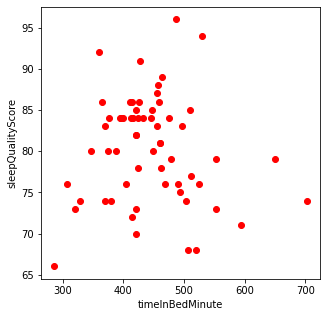

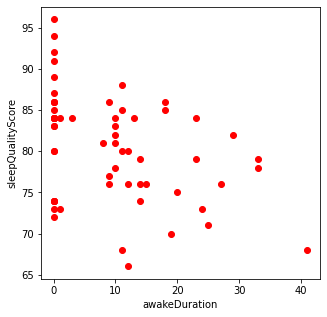

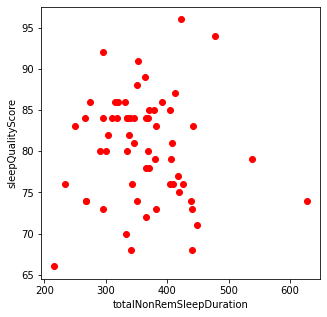

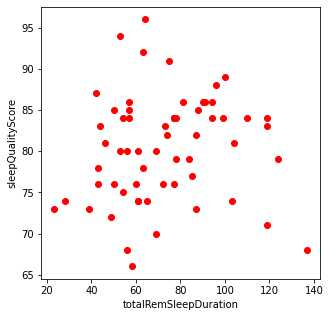

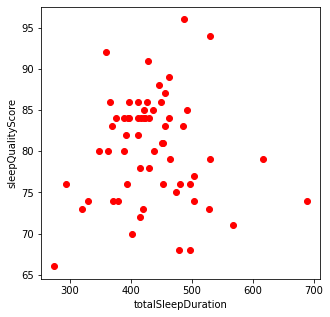

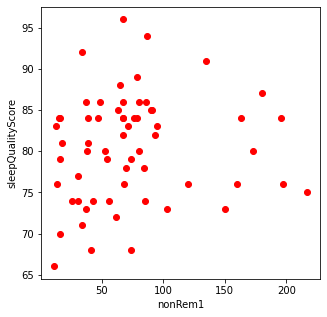

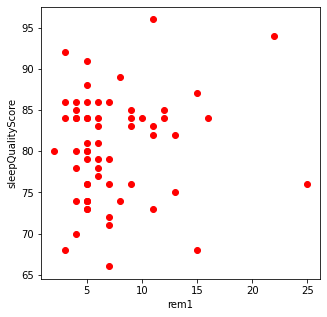

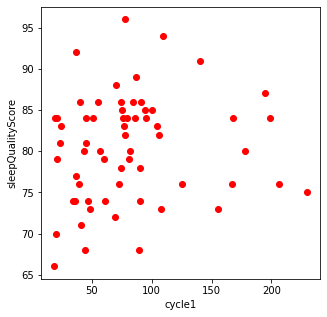

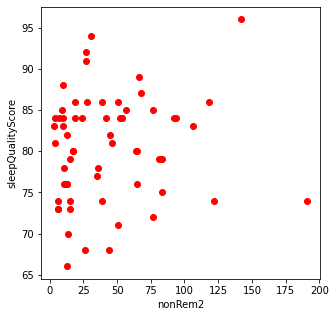

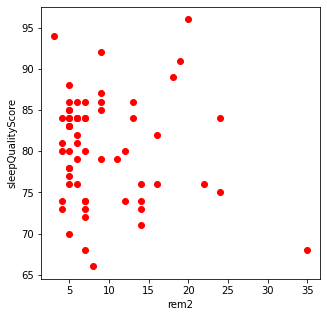

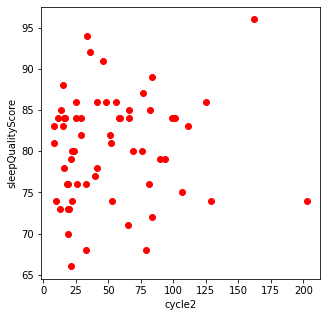

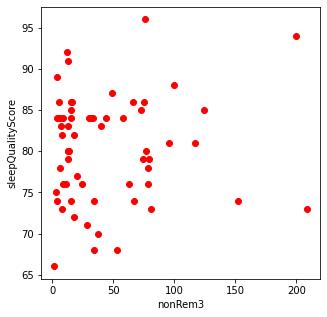

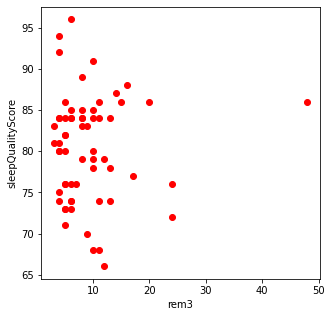

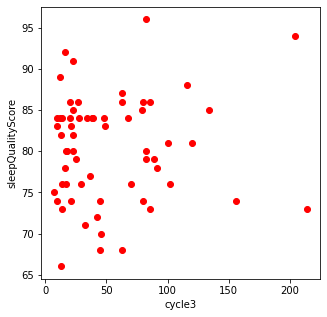

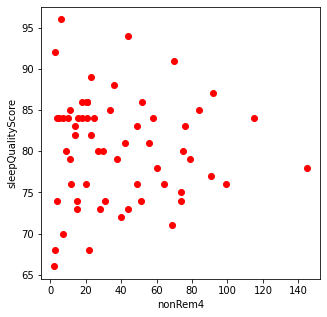

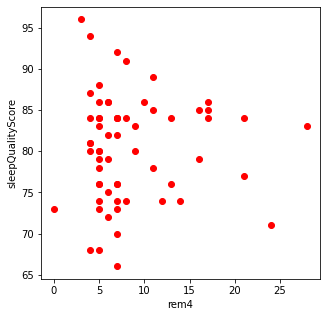

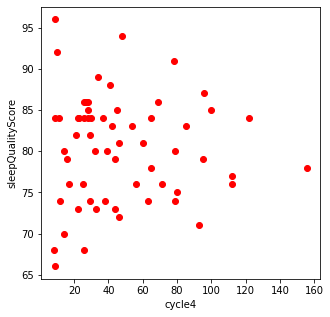

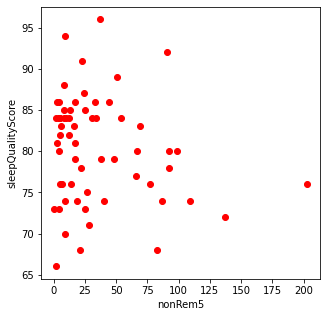

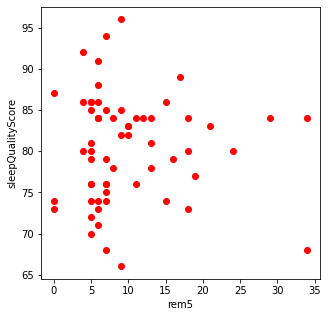

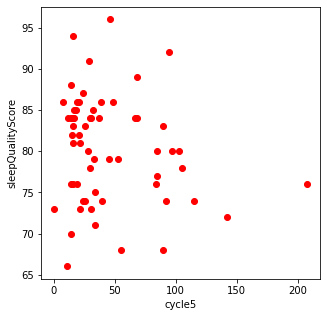

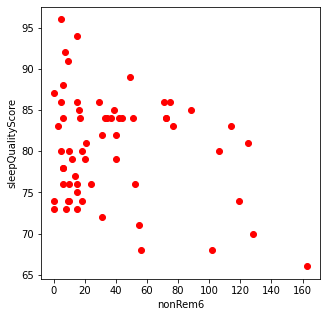

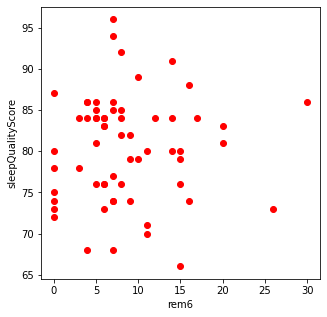

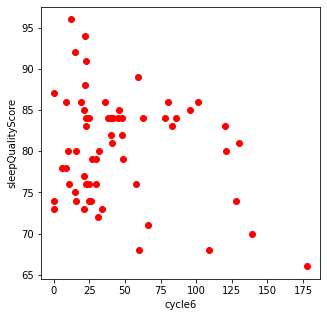

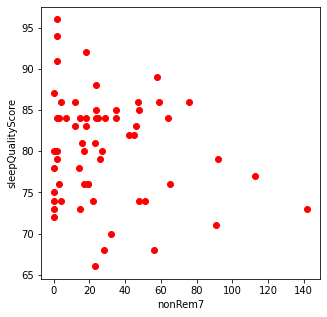

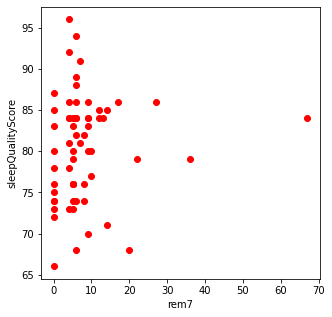

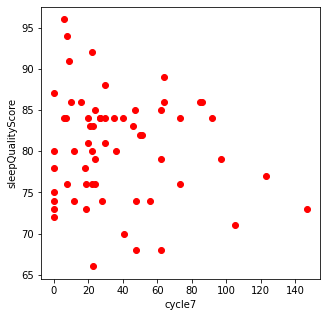

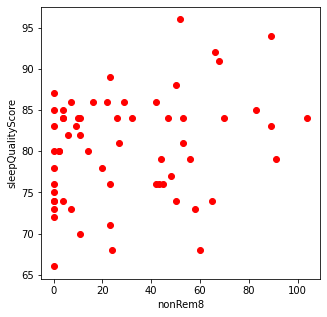

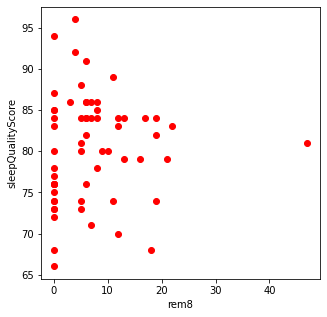

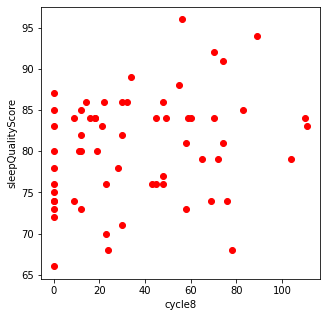

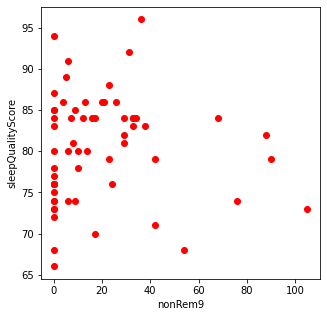

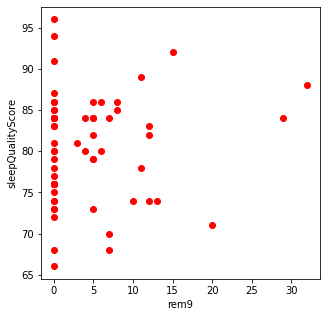

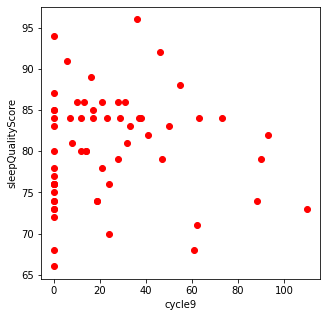

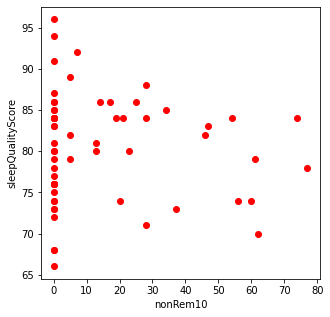

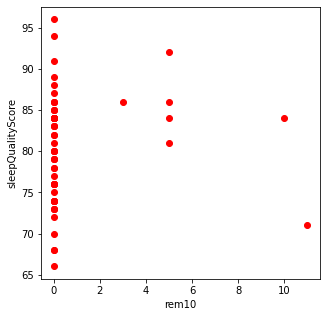

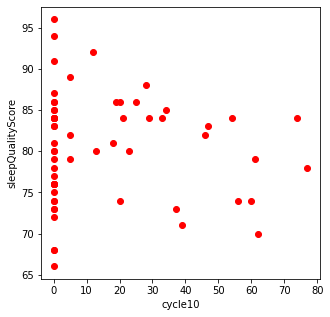

In [13]:
relationBetweenAttributes(sleepData)

TotalSleepDuration, timeInBed, totalNonRemSleepDuration, and totalRemSleepDuration appear to have the highest positive associations with the total sleep score when considered separately. In general, this makes sense since spending more time in bed should result in more sleep, and as REM sleep has been discovered to be crucial for many restorative processes, including memory formation, more sleep should be obtained.

<AxesSubplot:>

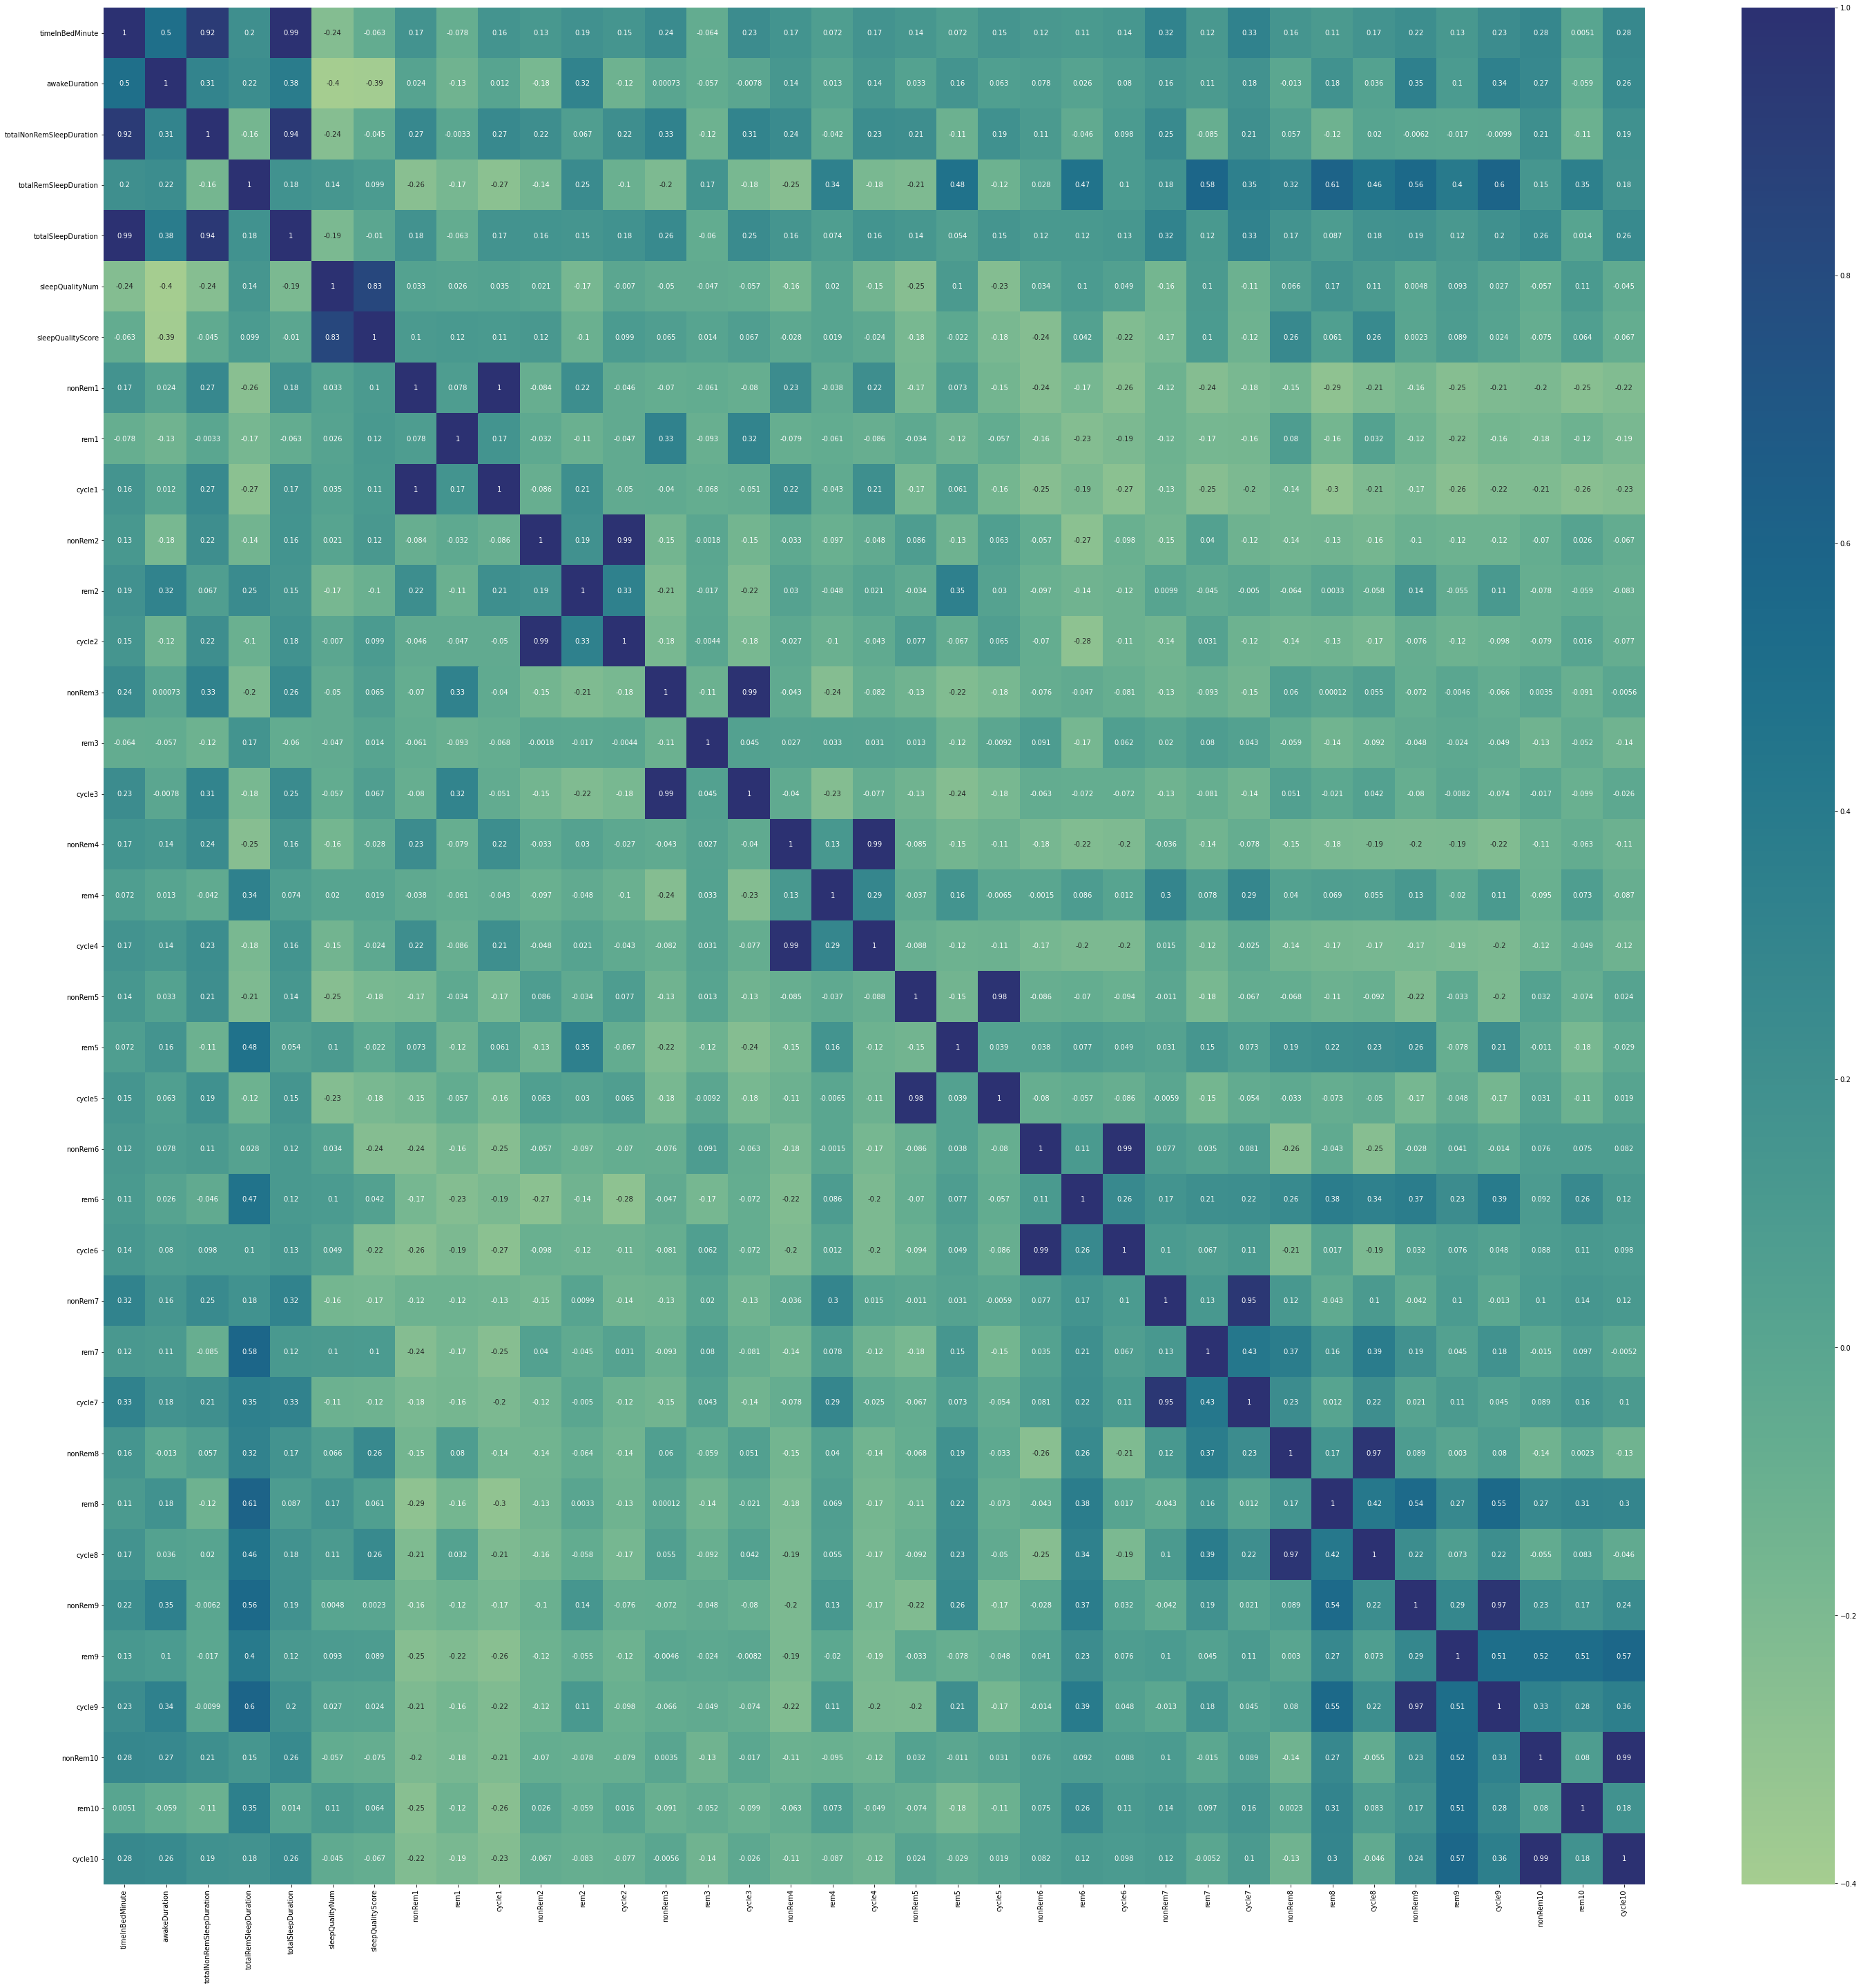

In [14]:
# Inspect the correlations
plt.figure(figsize=(50, 50))
sns.heatmap(sleepData.corr(), annot=True, cmap='crest',fmt='.2g')

In [15]:
# A function that calculates the r2 score, mean squarred error and accuracy values ​​of the model entered as a parameter
def score(model, features, target):
    predicted = model.predict(features)
    meanSquarredErr = mean_squared_error(target, predicted)
    r2Score = r2_score(target, predicted)
    mape = 100 * np.mean(abs(predicted - target) / target)
    accuracy = 100 - mape
    print('Model Performance')
    print('-----------------')
    print('Mean Squared Error: {:0.4f}'.format(meanSquarredErr))
    print('R^2 Score = {:0.4f}'.format(r2Score))
    print('Accuracy = {:0.3f}%'.format(accuracy))
    print('-----------------')
    

Model Performance
-----------------
Mean Squared Error: 13.4950
R^2 Score = 0.7048
Accuracy = 96.097%
-----------------


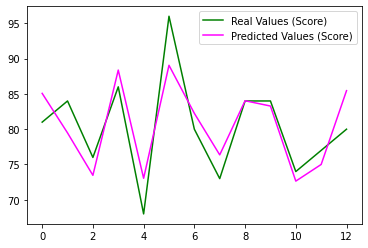

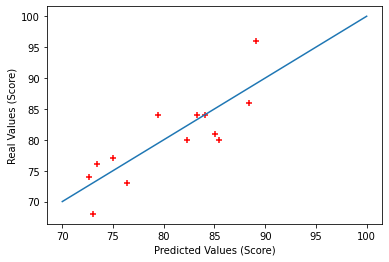

In [16]:
# Evaluate performance
score(fitRegModel, X_test, y_test)

# Make predictions
y_predicted = reg.predict(X_test)

plt.plot(y_test, label='Real Values (Score)',color='green')
plt.plot(y_predicted, label='Predicted Values (Score)',color='magenta')
plt.legend()
plt.show()


values = np.linspace(70, 100, 25)

plt.scatter(y_predicted, y_test,color='red',marker='+')
plt.xlabel("Predicted Values (Score)")
plt.ylabel("Real Values (Score)")
plt.plot(values,values)

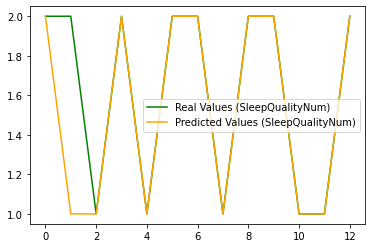

In [17]:
# It separates the score values in y_test and y_predicted as 0,1,2 as BAD, MEDIUM, GOOD and writes them to the lists.

y_test_num = [] 
y_predicted_num = []

for i in y_test.tolist():
    if i < 80:
        y_test_num.append(1)
    else:
        y_test_num.append(2)

for i in y_predicted.tolist():
   
    if i < 80:
        y_predicted_num.append(1)
    else:
        y_predicted_num.append(2)
        
plt.plot(y_test_num, label='Real Values (SleepQualityNum)',color='green')
plt.plot(y_predicted_num, label='Predicted Values (SleepQualityNum)',color='orange')
plt.legend()
plt.show()

## References<a class="anchor" id="references"></a>

1- https://www.sciencedirect.com/topics/economics-econometrics-and-finance/multiple-regression-analysis#:~:text=Multiple%20regression%20analysis%20allows%20researchers,of%20other%20predictors%20statistically%20eliminated

2- https://www.w3schools.com/python/python_ml_multiple_regression.asp

3- https://medium.com/machine-learning-with-python/multiple-linear-regression-implementation-in-python-2de9b303fc0c

4- https://seaborn.pydata.org/generated/seaborn.heatmap.html

5- https://matplotlib.org/stable/tutorials/introductory/pyplot.html

6- Principles and Practice of Sleep Medicine, 4th edition

7- Fundamentals of Sleep Medicine

8- Datacamp Supervised Learning with scikit-learn Course


**Disclaimer!** <font color='grey'>This notebook was prepared by Oğuzhan Ertekin and Ahmet Karaca as a term project for the *BBM467 - Data Intensive Applications* class. The notebook is available for educational purposes only. There is no guarantee on the correctness of the content provided as it is a student work.

If you think there is any copyright violation, please let us [know](https://forms.gle/BNNRB2kR8ZHVEREq8). 
</font>